# Taking a look at New Jersey's changing Hispanic/Latino population post-election

## Findings

#### To sum it all up, here's what we discovered about population changes:

- Between 2019 and 2023, New Jersey counties' Hispanic/Latino populations grew by an average of 16 percent. The nationwide change in the Hispanic/Latino population, however, grew only by 6 percent, representing a 10 percentage point difference. 

- New Jersey's Sussex, Hunterdon, Warren, Gloucester and Mercer counties saw the greatest growth. Sussex county, in particular, saw its Hispanic/Latino population grow by nearly 40 percent between 2019 and 2023. 

- Hudson, Cape May, Passaic, Atlantic and Essex counties saw the least amount of growth among this demographic. In fact, Hudson county's non-Hispanic/Latino population actually grew by 3 percent between 2019 and 2023.

#### Voters:

- Essex, Mercer, Camden, Hudson and Union counties had the largest proportion of voters who voted for the Democratic candidate Kamala Harris. 

- Ocean, Sussex, Warren, Cape May and Salem counties had the largest proportion of voters who casted their ballot for Republican candidate Donald Trump. 

#### Did the population growth contribute to the way the election turned out?

- By referring to the R-square metric in the regression, we see that only 15.9% of a county's proportion of Republican votes can be explained by the county's changed Hispanic/Latino population. 
- By switching around the variables, you can see that even less of the Democrat vote depended on the county's changed Hispanic/Latino population. 

## Step 1: Imports

Import the libraries we'll need for this project. 

Also, make sure to read in the CSV files from the "input" folder and assign them as dataframes. You can also check to ensure that all of the data is consistent during this step by using df.info() or df.head().  

In [1]:
## import libraries
import pandas as pd

In [2]:
## load 2019 New Jersey Counties American Community Survey
nj_2019 = pd.read_csv("../input/2019-acs-nj.csv")

In [3]:
## load 2023 New Jersey Counties American Community Survey
nj_2023 = pd.read_csv("../input/2023-acs-nj.csv")

In [4]:
## load 2019 Nationwide American Community Survey
us_2019 = pd.read_csv("../input/2019-acs-us.csv")

In [5]:
## load 2023 Nationwide American Community Survey
us_2023 = pd.read_csv("../input/2023-acs-us.csv")

## Step 3: Merge dataframes

In [6]:
nj_combined = nj_2019.merge(nj_2023, left_on='label', right_on='label', suffixes=('_nj19', '_nj23'))
us_combined = us_2019.merge(us_2023, left_on='label', right_on='label', suffixes=('_us19', '_us23'))

## Step 4: Analysis Population Changes

### Percents and percentage change

For each year, find the percentage of each county's population that is Hispanic/Latino and non-Hispanic/Latino. Do the same for the U.S.-specific data. 

Then, use the percent change formula to find how much these populations have changed since the first reporting year (2019). 

As a reminder, the formula is:

(new value - old value) / old value

In [7]:
## create a new column for the percentage of the population in each county that is Hispanic/Latino for 2019
nj_combined["pct_hispanic_19"] = \
nj_combined["Hispanic or Latino (of any race)_nj19"]/nj_combined["Total population_nj19"]

## create a new column for the percentage of the population in each county that is Hispanic/Latino for 2023
nj_combined["pct_hispanic_23"] = \
nj_combined["Hispanic or Latino (of any race)_nj23"]/nj_combined["Total population_nj23"]

In [8]:
## create a new column for the percentage of the population in each county that is NOT Hispanic/Latino for 2019
nj_combined["pct_non_hispanic_19"] = \
nj_combined["Not Hispanic or Latino_nj19"]/nj_combined["Total population_nj19"]

## create a new column for the percentage of the population in each county that is NOT Hispanic/Latino for 2023
nj_combined["pct_non_hispanic_23"] = \
nj_combined["Not Hispanic or Latino_nj23"]/nj_combined["Total population_nj23"]

In [9]:
## make new columns that store the percent change between 2019 and 2023 
## for Hispanic/Latino and non-Hispanic/Latino residents.

## Hispanic/Latino percent change
nj_combined["pct_chg_hispanic"] = \
(nj_combined["pct_hispanic_23"] - nj_combined["pct_hispanic_19"])/nj_combined["pct_hispanic_19"]

## Non-Hispanic/Latino percent change
nj_combined["pct_chg_nonhispanic"] = \
(nj_combined["pct_non_hispanic_23"] - nj_combined["pct_non_hispanic_19"])/nj_combined["pct_non_hispanic_19"]

In [10]:
## create a new column for the percentage of the population that is Hispanic/Latino for 2019
us_combined["pct_hispanic_19"] = \
us_combined["Hispanic or Latino (of any race)_us19"]/us_combined["Total population_us19"]

## create a new column for the percentage of the population that is Hispanic/Latino for 2023
us_combined["pct_hispanic_23"] = \
us_combined["Hispanic or Latino (of any race)_us23"]/us_combined["Total population_us23"]

In [11]:
## create a new column for the percentage of the population that is NOT Hispanic/Latino for 2019
us_combined["pct_non_hispanic_19"] = \
us_combined["Not Hispanic or Latino_us19"]/us_combined["Total population_us19"]

## create a new column for the percentage of the population that is NOT Hispanic/Latino for 2023
us_combined["pct_non_hispanic_23"] = \
us_combined["Not Hispanic or Latino_us23"]/us_combined["Total population_us23"]

In [12]:
## Hispanic/Latino percent change
us_combined["pct_chg_hispanic"] = \
(us_combined["pct_hispanic_23"] - us_combined["pct_hispanic_19"])/us_combined["pct_hispanic_19"]

## Non-Hispanic/Latino percent change
us_combined["pct_chg_nonhispanic"] = \
(us_combined["pct_non_hispanic_23"] - us_combined["pct_non_hispanic_19"])/us_combined["pct_non_hispanic_19"]

### Which entity had the greatest growth in its Hispanic/Latino population since the last election?

If we use df.describe(), we can take a look at the mean -- or average -- change in the New Jersey's Hispanic/Latino population. 

We'll do the same for the U.S., though it's not really necessary: since we only have one row of data for the U.S. dataframe, .describe() will return the same mean as if we ran .head()

In [13]:
us_combined.describe().round(2)

,Total population_us19,Hispanic or Latino (of any race)_us19,Mexican_us19,Puerto Rican_us19,Cuban_us19,Other Hispanic or Latino_us19,Not Hispanic or Latino_us19,White alone_us19,Black or African American alone_us19,American Indian and Alaska Native alone_us19,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",pct_hispanic_19,pct_hispanic_23,pct_non_hispanic_19,pct_non_hispanic_23,pct_chg_hispanic,pct_chg_nonhispanic
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00
mean,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01
25%,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01
50%,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01
75%,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01
max,328239523.0,60481746.0,37186361.0,5828706.0,2381565.0,15085114.0,267757777.0,196789401.0,40596040.0,2236348.0,...,1949065.0,14813501.0,3297389.0,11516112.0,0.18,0.19,0.82,0.81,0.06,-0.01


In [14]:
nj_combined.describe().round(2)

,Total population_nj19,Hispanic or Latino (of any race)_nj19,Mexican_nj19,Puerto Rican_nj19,Cuban_nj19,Other Hispanic or Latino_nj19,Not Hispanic or Latino_nj19,White alone_nj19,Black or African American alone_nj19,American Indian and Alaska Native alone_nj19,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",pct_hispanic_19,pct_hispanic_23,pct_non_hispanic_19,pct_non_hispanic_23,pct_chg_hispanic,pct_chg_nonhispanic
count,21.00,21.00,19.00,19.00,19.00,19.00,21.00,21.00,21.00,21.0,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,422961.43,88421.19,11508.00,23644.42,4628.05,57235.53,334540.24,229755.52,53554.43,441.0,...,3670.19,16161.52,5142.05,11019.48,0.18,0.20,0.82,0.80,0.16,-0.03
std,261901.22,83807.20,9665.32,15244.84,6329.93,60070.78,202019.54,140360.19,66110.55,466.3,...,3166.89,9959.28,3961.12,6659.78,0.11,0.11,0.11,0.11,0.12,0.02
min,62385.00,6089.00,275.00,2068.00,107.00,3730.00,56296.00,45679.00,2924.00,0.0,...,0.00,2653.00,572.00,1290.00,0.07,0.08,0.57,0.55,-0.04,-0.06
25%,149527.00,19500.00,4915.00,11066.00,1196.00,9931.00,127584.00,119294.00,16263.00,52.0,...,1395.00,6909.00,2029.00,4783.00,0.10,0.12,0.78,0.76,0.07,-0.03
50%,445349.00,57819.00,10160.00,23930.00,1444.00,31704.00,299607.00,202275.00,36245.00,253.0,...,2685.00,14962.00,4316.00,10853.00,0.15,0.18,0.85,0.82,0.15,-0.02
75%,607186.00,182108.00,14748.00,32055.50,5454.00,110287.50,423698.00,295613.00,71102.00,660.0,...,6255.00,23832.00,7972.00,16236.00,0.22,0.24,0.90,0.88,0.21,-0.02
max,932202.00,286981.00,36799.00,52338.00,24617.00,195648.00,736205.00,512813.00,307051.00,1376.0,...,10326.00,35093.00,15358.00,20909.00,0.43,0.45,0.93,0.92,0.38,0.03


### Which counties in New Jersey saw the greatest growth in their Hispanic/Latino populations? Which saw the least?

We can find the counties that saw the greatest growth by sorting the dataframe according to the "pct_chg_hispanic" column. To view the sort in reverse order -- so that we order the counties from greatest to least growth -- use assign ascending as False. 

In [15]:
nj_combined.sort_values( by = "pct_chg_hispanic", ascending = False).head(5)

,label,Total population_nj19,Hispanic or Latino (of any race)_nj19,Mexican_nj19,Puerto Rican_nj19,Cuban_nj19,Other Hispanic or Latino_nj19,Not Hispanic or Latino_nj19,White alone_nj19,Black or African American alone_nj19,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",pct_hispanic_19,pct_hispanic_23,pct_non_hispanic_19,pct_non_hispanic_23,pct_chg_hispanic,pct_chg_nonhispanic
18,sussex,140488,12904,275.0,5618.0,1135.0,5876.0,127584,119294,3431,...,568,3780,2490,1290,0.091851,0.127207,0.908149,0.872793,0.384923,-0.038932
9,hunterdon,124371,8694,1639.0,2068.0,1257.0,3730.0,115677,104852,2924,...,715,4809,2200,2609,0.069904,0.095888,0.930096,0.904112,0.371716,-0.027937
20,warren,105267,10697,376.0,3862.0,107.0,6352.0,94570,84398,4965,...,847,3442,784,2658,0.101618,0.136842,0.898382,0.863158,0.346639,-0.039209
7,gloucester,291636,19500,4096.0,9830.0,769.0,4805.0,272136,226459,30153,...,1768,14962,1936,13026,0.066864,0.086936,0.933136,0.913064,0.300185,-0.021510
10,mercer,367430,67823,4655.0,16948.0,1327.0,44893.0,299607,177010,71102,...,1395,11568,2029,9539,0.184588,0.233277,0.815412,0.766723,0.263773,-0.059711


In [16]:
nj_combined.sort_values( by = "pct_chg_hispanic", ascending = True).head(5)

,label,Total population_nj19,Hispanic or Latino (of any race)_nj19,Mexican_nj19,Puerto Rican_nj19,Cuban_nj19,Other Hispanic or Latino_nj19,Not Hispanic or Latino_nj19,White alone_nj19,Black or African American alone_nj19,...,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",pct_hispanic_19,pct_hispanic_23,pct_non_hispanic_19,pct_non_hispanic_23,pct_chg_hispanic,pct_chg_nonhispanic
8,hudson,672391,286981,22131.0,44585.0,24617.0,195648.0,385410,193721,69570,...,10326,23832,10556,13276,0.426807,0.407656,0.573193,0.592344,-0.044869,0.033410
4,capemay,92039,7452,NaN,NaN,NaN,NaN,84587,78257,3859,...,0,4327,632,3695,0.080966,0.083881,0.919034,0.916119,0.036009,-0.003172
15,passaic,501826,215329,36799.0,30121.0,5961.0,142448.0,286497,202275,52379,...,3729,10844,3581,7263,0.429091,0.446570,0.570909,0.553430,0.040736,-0.030617
0,atlantic,263670,51129,10160.0,16430.0,489.0,24050.0,212541,147400,36245,...,1831,11137,1958,9179,0.193913,0.205423,0.806087,0.794577,0.059356,-0.014279
6,essex,798975,190013,8900.0,52338.0,4947.0,123828.0,608962,238115,307051,...,9147,35093,15358,19735,0.237821,0.252549,0.762179,0.747451,0.061930,-0.019324


## Step 5: Analyze voter data

Now, analyze the voter data to figure out who won in each county and by how much. To do this, we'll find the percentage of votes that went to each major-party candidate, then we'll find the difference between those percentages. 

In [17]:
## read in file
votes = pd.read_excel("../input/votes_2024.xlsx")

In [18]:
## find the percentage of votes for the Republican and Democratic candidates,
## then store in new columns

votes["pct_rep"] = votes["r_votes"]/votes["total_votes"]
votes["pct_dem"] = votes["d_votes"]/votes["total_votes"]

In [19]:
## find the percentage point difference, then add it to a new column

votes["pt_diff"] = votes["pct_rep"] - votes["pct_dem"]
votes["pt_diff"] = votes["pt_diff"].abs()

### Which counties had the greatest proportion of voters who voted for Kamala Harris (D)?

In [20]:
votes.sort_values(by = ["pct_dem", "pt_diff"], ascending = False).head()

,label,total_votes,d_votes,r_votes,pct_rep,pct_dem,pt_diff
6,essex,313283,224596,83908,0.267835,0.716911,0.449076
10,mercer,163779,107558,52274,0.319174,0.656726,0.337552
3,camden,247786,155522,87767,0.354205,0.627646,0.273442
8,hudson,232232,144765,79913,0.344108,0.623364,0.279255
19,union,241923,147327,89063,0.368146,0.608983,0.240837


### Which counties had the greatest proportion of voters who voted for Donald J. Trump (R)?

In [21]:
votes.sort_values(by = ["pct_rep", "pt_diff"], ascending = False).head()

,label,total_votes,d_votes,r_votes,pct_rep,pct_dem,pt_diff
14,ocean,340300,105789,227232,0.667740,0.310870,0.356870
18,sussex,84917,31019,52123,0.613811,0.365286,0.248525
20,warren,60628,23318,35772,0.590024,0.384608,0.205417
4,capemay,54786,21648,32151,0.586847,0.395137,0.191710
16,salem,31255,12236,18227,0.583171,0.391489,0.191681


## Step 6: Perform a linear regression

In [22]:
## import libraries
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [23]:
## filter down the nj_combined df
nj_placeholder = nj_combined[["label",
                              "pct_hispanic_19",
                              "pct_hispanic_23",
                              "pct_non_hispanic_19",
                              "pct_non_hispanic_23",
                              "pct_chg_hispanic",
                              "pct_chg_nonhispanic"]]

In [24]:
## then combine the nj_combined df with the votes df
all_data = nj_placeholder.merge(votes, left_on = "label", right_on = "label")
all_data.head()

,label,pct_hispanic_19,pct_hispanic_23,pct_non_hispanic_19,pct_non_hispanic_23,pct_chg_hispanic,pct_chg_nonhispanic,total_votes,d_votes,r_votes,pct_rep,pct_dem,pt_diff
0,atlantic,0.193913,0.205423,0.806087,0.794577,0.059356,-0.014279,129549,61438,65611,0.506457,0.474245,0.032212
1,bergen,0.210252,0.232953,0.789748,0.767047,0.107970,-0.028744,463837,232660,217096,0.468044,0.501599,0.033555
2,burlington,0.085338,0.099890,0.914662,0.900110,0.170526,-0.015910,230183,132275,94115,0.408870,0.574651,0.165781
3,camden,0.175817,0.195193,0.824183,0.804807,0.110208,-0.023510,247786,155522,87767,0.354205,0.627646,0.273442
4,capemay,0.080966,0.083881,0.919034,0.916119,0.036009,-0.003172,54786,21648,32151,0.586847,0.395137,0.191710


I want to see how much the Republican vote was dependent on the change in each counties Hispanic/Latino population. Therefore, I'm setting my dependent variable as the percentage of voters who casted a ballot for the Republican candidate. 

In [25]:
X = all_data[['pct_chg_hispanic']]
y = all_data.pct_rep

Next, I'm introducing the Ordinary Least Squares function from the statsmodels library. By modeling our data to the OLS function, we can measure the difference between points in the data set. It will also predict a best fit line for the linear regression. 

In [26]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pct_rep   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.603
Date:                Fri, 06 Dec 2024   Prob (F-statistic):             0.0730
Time:                        22:22:00   Log-Likelihood:                 19.670
No. Observations:                  21   AIC:                            -35.34
Df Residuals:                      19   BIC:                            -33.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4187      0.038     11.111      0.000       0.340       0.498
pct_chg_hispanic     0.3616      0.190      1.898      0.073      -0.037       0.760
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.117
Skew:                          -0.129   Prob(JB):                        0.943
Kurtosis:                       2.740   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the linear regression

By looking at R-Squared, we see that only .159 -- or about 16% -- of the percentage of Republican votes in each county can be explained by the county's changed Hispanic/Latino population. We can create a scatterplot to see this more clearly. 

Text(0, 0.5, '% Rep Vote')

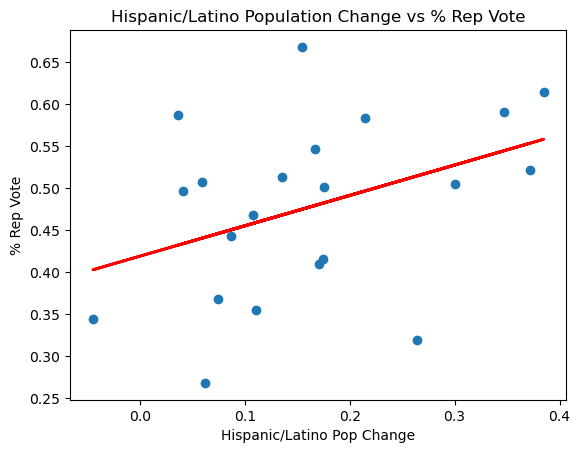

In [34]:
# create the scatterplot
plt.scatter(all_data.pct_chg_hispanic, all_data.pct_rep)

# create the regression line
plt.plot(X['pct_chg_hispanic'], 
         results.predict(), 
         color='red', 
         linewidth=2, 
         label='Regression line'
)

# customize the plot
plt.title("Hispanic/Latino Population Change vs % Rep Vote")
plt.xlabel("Hispanic/Latino Pop Change")
plt.ylabel("% Rep Vote")